# Praktikum Informationstechnik im Maschinenbau II
## P11 - Machine Learning mit Python

Das folgende PT ist eine recht einfache Einführung in die Grundlagen des Maschinellen Lernens (ML). 
Hierzu wird ein Tutorial aus dem Buch: „Machine Learning mit Python und Scikit-Learn und Tensorflow“ (ISBN 978-1-78712-593-3) abgeändert. Das Buch ist als englische ebook-Version in der Bibliothek erhältlich, bzw. steht im ilias Kurs zur Verfügung.
Eine typische Anwendung von ML-Algorithmen ist die Klassifizierung von Daten, d.h. Datensätze (Muster) werden nach bestimmten
Kriterien bewertet und einer Klasse, also einer Menge gleichartiger Objekte, zugeordnet. So können z.B. unterschiedliche Zustände von
Maschinen oder Werkzeugen diagnostiziert werden. Auch die Sprach- bzw. Bilderkennung basiert auf diesen Verfahren.
Im Folgenden sollen verschiedene Gattungen von Blumen (Iris) aufgrund von Merkmalen unterschieden werden.

### Problemstellung
Bild 1 zeigt eine typische Irisblüte, die man durch die Länge und Breite ihrer Kelch- und Blütenblätter unterscheiden kann.
Jeder Datensatz besteht aus einer durchgängigen Nummerierung, vier Merkmalen und einer Zuordnung zu einer der Gattungen (Klassen).
Der erste Datensatz des sog. „Iris data sets“ kann daher als Array mit sechs Einträgen erzeugt werden.
Es soll eine Musterklassifikation erstellt werden, die zwei bzw. alle drei Iris Sorten (setosa, versicolor, viriginica) anhand ihrer
Kelch- und Blütenblätter unterscheiden.
![](ML_Iris01.png) 

## Aufgabe 1 - Vorbereitung und Anwendung eines Perceptrons

Die Aufgabe besteht aus den Teilschritten:
1. Datensatz von Webseite einlesen und Ändern der Spalte species in "category"
2. Grafische Darstellung und Beurteilung der Separierbarkeit
3. Trainieren eines Perceptrons für zwei Klassen und Prüfung des Ergebnisses

### __Teilschritt 1: Datensatz von Webseite einlesen und Ändern der Spalte species in "category"__
Der Iris-Datensatz steht unter „https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data“ 
als csv Datei zur Verfügung. Als erstes muss der Datensatz gelesen werden. Das sollte mit pandas erfolgen,
um die Daten in ein DataFrame-Objekt zu lesen und zu überprüfen.

In [1]:
# Standard-Imports (numpy, matplotlib, pandas)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Einlesen in Dataframe (die Spalten sollen 'sl', 'sw', 'pl', 'pw' und 'species' heißen)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sl', 'sw', 'pl', 'pw', 'species'], header= None)
df

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Umwandeln der Spalte "species" in Datentyp category
df.species = df.species.astype('category')

In [4]:
# Anzeige der enthaltenen Kategorien (mittels "Accessor" .cat)
df.species.cat.categories

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

> Warum wandeln wir in "category"? Die Daten aus der Klassenzugehörigkeit sind Strings, sklearn benötigt in vielen Fällen numerische Labels. (Solange wir nur klassifizieren, können die Labels auch andere Datentypen sein.) 

In [5]:
# Anzeige der Zahlencodes  (mittels "Accessor" .cat)
df.species.cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [6]:
print(df['species'].cat.codes)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sl       150 non-null    float64 
 1   sw       150 non-null    float64 
 2   pl       150 non-null    float64 
 3   pw       150 non-null    float64 
 4   species  150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


### __Teilschritt 2: Grafische Darstellung und Beurteilung der Separierbarkeit__

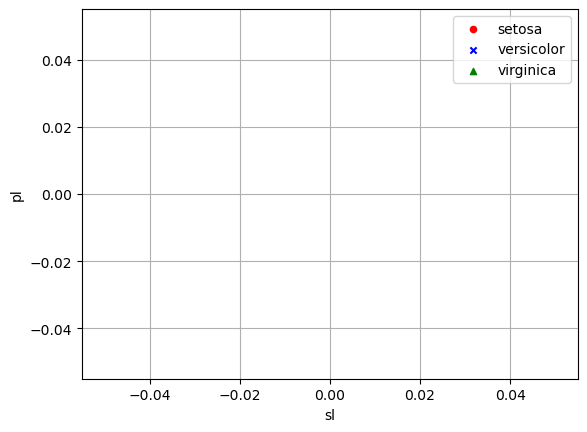

In [8]:
# Erstellung eines "scatter"-Diagramm, in dem jede Art farblich und durch Marker erkennbar ist
fig, myax = plt.subplots()
df[df.species=='iris-setosa'].plot.scatter('sl', 'pl', c='red', marker='o', ax=myax, label='setosa')
df[df.species=='iris-versicolor'].plot.scatter('sl', 'pl', c='blue', marker='x', ax=myax, label='versicolor')
df[df.species=='iris-virginica'].plot.scatter('sl', 'pl', c='green', marker='^', ax=myax, label='virginica')
plt.legend()
plt.grid()

In [9]:
# Beurteilung der Klassifizierbarkeit



### __Teilschritt 3: Trainieren eines Perceptrons für zwei Klassen und Prüfung des Ergebnisses__
Trainieren Sie ein `Perceptron`, welches zunächst nur setosa und versicolor unterscheiden kann. Schritte:

- Erzeugen der Featurematrix `X` und des Vektors der Labels `y`
- Aufspalten in Trainings- und Testdaten
- Erzeugen einer Instanz der Klasse `Perceptron` und Einstellen einiger Parameter
- Anpassen der Gewichte und Schwellwerte an die Daten (Lernen) mittels `.fit()`
- Prüfen der Klassifikationsgüte mittels `.predict()`
- Grafische Darstellung mit Hilfe der Funktion `plot_decision_regions`

In [10]:
# Importieren der Klasse Perceptron und der Hilfsfunktion train_test_split von sklearn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split 

In [11]:
# "Feature-Matrix" X (Zeilenauswahl: nur setosa und versicolor). Spalten sl und pl. Umwandlung in numpy-Array mit .to_numpy()
X = df.loc[df.species != 'iris-virginica', ['sl', 'pl']].to_numpy()

In [12]:
# Label-Vektor (Zeilenauswahl wie X, Labels sind Zahlencodes). Umwandlung in numpy-Array mit .to_numpy())
y = df.loc[df.species != 'iris-virginica', 'species'].cat.codes.to_numpy()

In [13]:
# Aufsplitten von X in X_train und X_test und y in y_train und y_test im Verhältnis 70/30 mittels Hilfsfunktion train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
# Erzeugen einer Instanz und Einstellen der Parameter max_iter=4000 und eta0=0.1
ppn = Perceptron(max_iter=4000, eta0=0.1)

In [15]:
# Anpassen der Gewichte und Schwellwerte an die Daten (Lernen) mittels .fit()
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=4000)

In [16]:
# Erzeugen der Labels zu den Testdaten mit .predict() 
y_pred = ppn.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int8)

In [17]:
# Prüfen auf Übereinstimmung und Ausgabe des prozentualen Anteil der falsch klassifierten
richtig = y_pred == y_test
f'richtig vorhergesagt {richtig.sum()}, falsh vorhergesagt {np.logical_not(richtig).sum()}'

'richtig vorhergesagt 13, falsh vorhergesagt 32'

In [21]:
# im Falle von nur zwei Features können wir die Klassifikation auch grafisch prüfen. Importieren Sie dazu `plot_decision_regions' aus der gleichnamigen .py-Datei 
from plot_decision_regions import plot_decision_regions

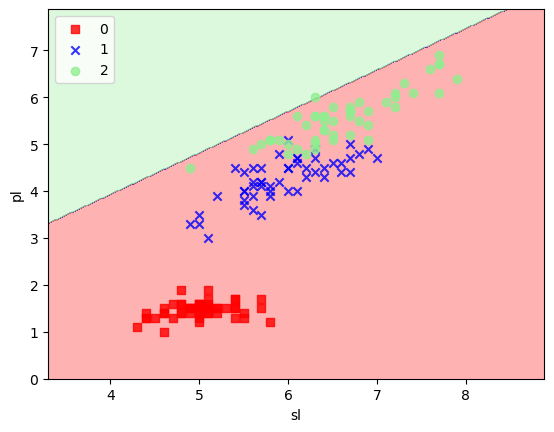

In [19]:
plot_decision_regions(X, y, classifier=ppn)